In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### XGBOOST

In [2]:
df_train = pd.read_csv('../data/train_con_features_encoded.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features_encoded.csv', index_col='Unnamed: 0')
display(df_train.head())

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,...,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes,tipodepropiedad_cb,ciudad_cb,provincia_cb
0,254099,8.116114,2.0,1.0,2.0,80.0,80.0,0.0,0.0,0.0,...,0,0.000000,1,0,0,2015,8,2.763765e+06,3.384582e+06,3.471689e+06
1,53461,10.000000,3.0,2.0,2.0,268.0,180.0,0.0,0.0,0.0,...,1,0.007968,1,0,0,2013,6,2.898908e+06,4.604780e+06,3.471689e+06
2,247984,5.000000,3.0,2.0,2.0,144.0,166.0,0.0,0.0,0.0,...,10,0.046957,0,0,0,2015,10,2.398159e+06,8.890818e+05,2.367701e+06
3,209067,1.000000,2.0,1.0,1.0,63.0,67.0,0.0,0.0,0.0,...,0,0.000000,0,0,0,2012,3,2.398159e+06,1.479134e+06,2.762459e+06
4,185997,10.000000,2.0,1.0,1.0,95.0,95.0,0.0,0.0,0.0,...,1,0.074108,0,0,0,2016,6,2.763765e+06,2.749654e+06,2.367701e+06


In [14]:
feature_cols = df_train.columns.tolist()
feature_cols.remove('precio')

X = df_train[feature_cols]
y = df_train['precio']

feature_cols

['id',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(180000, 41) (180000,)
(60000, 41) (60000,)


In [5]:
import xgboost as xgb

"""hyp_params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.1, 0.2 ],
    "alpha"            : [ 1, 3, 5, 7, 9, 10 ],
    "colsample_bytree" : [ 0.5 , 0.7, 0.8, 0.9 ], 
    "n_estimators"     : [500, 700, 1000] 
}
#colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 500 gamma 0.0, 

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

skf = StratifiedKFold(10, shuffle=True, random_state=0)
random_search = RandomizedSearchCV(XGBoost, param_distributions=hyp_params, n_iter=10, cv=skf.split(X,y), scoring='neg_mean_squared_error')
random_search.fit(X, y)

best_hyp = random_search.best_params_
best_hyp"""

'hyp_params = {\n    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],\n    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],\n    "min_child_weight" : [ 1, 3, 5, 7 ],\n    "gamma"            : [ 0.1, 0.2 ],\n    "alpha"            : [ 1, 3, 5, 7, 9, 10 ],\n    "colsample_bytree" : [ 0.5 , 0.7, 0.8, 0.9 ], \n    "n_estimators"     : [500, 700, 1000] \n}\n#colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 500 gamma 0.0, \n\nfrom sklearn.model_selection import RandomizedSearchCV, StratifiedKFold\n\nskf = StratifiedKFold(10, shuffle=True, random_state=0)\nrandom_search = RandomizedSearchCV(XGBoost, param_distributions=hyp_params, n_iter=10, cv=skf.split(X,y), scoring=\'neg_mean_squared_error\')\nrandom_search.fit(X, y)\n\nbest_hyp = random_search.best_params_\nbest_hyp'

In [6]:
best_n_estimators = 500 #best_hyp['n_estimators'] 
best_min_child_weight = 7 #best_hyp['min_child_weight']
best_max_depth = 5 #best_hyp['max_depth']
best_learning_rate = 0.08 #best_hyp['learning_rate']
best_gamma = 0.0 #best_hyp['gamma']
best_colsample_bytree = 0.8 #best_hyp['colsample_bytree']
best_alpha = 10 #best_hyp['alpha']

In [7]:
XGBoost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=best_n_estimators, min_child_weight=best_min_child_weight, 
                           max_depth=best_max_depth, learning_rate=best_learning_rate, gamma=best_gamma, 
                           colsample_bytree=best_colsample_bytree, alpha=best_alpha, eval_metric='mae')

XGBoost_fit = XGBoost.fit(X_train, y_train)

C:\Users\spu340pdg\Documents\Python\Portable Python-3.7.4 x64\App\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [8]:
XGBoost_pred = XGBoost_fit.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error

XGBoost_mae = mean_absolute_error(y_test, XGBoost_pred)
XGBoost_mae_train = mean_absolute_error(y_train, XGBoost_fit.predict(X_train))
print(f"MAE XGBoost (train): {XGBoost_mae_train:.5f}")
print(f"MAE XGBoost: {XGBoost_mae:.5f}")
print("------------------------------")

MAE XGBoost (train): 585858.43283
MAE XGBoost: 609339.01235
------------------------------


In [10]:
XGBoost_fit.feature_importances_

array([0.0023598 , 0.01516657, 0.00881242, 0.04038796, 0.1076781 ,
       0.23411772, 0.03553381, 0.01185645, 0.00188857, 0.01697644,
       0.00400852, 0.00610328, 0.03250262, 0.00410497, 0.01296796,
       0.03845522, 0.00721225, 0.00468328, 0.03304978, 0.01023486,
       0.12558487, 0.03377045, 0.0055556 , 0.00359088, 0.01343194,
       0.00979382, 0.00176591, 0.00096936, 0.00187548, 0.00318107,
       0.00310561, 0.0030788 , 0.00571336, 0.00457153, 0.00643255,
       0.00413461, 0.04829057, 0.0052143 , 0.0192043 , 0.04160654,
       0.03102782], dtype=float32)

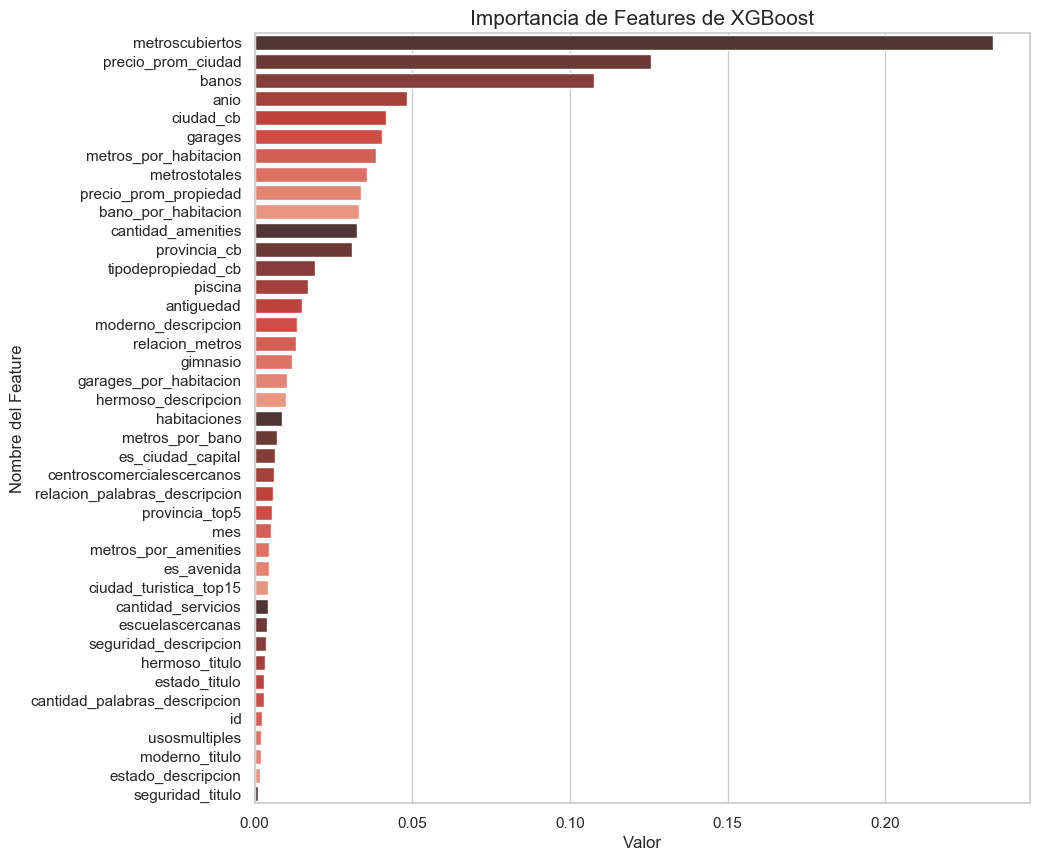

In [11]:
features = pd.DataFrame(index=feature_cols)

features['imp'] = XGBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)
features

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de XGBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

In [12]:
df_train_sumbit = df_train
df_test_submit = df_test[feature_cols]
XGBoost_pred_sumbit = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=best_n_estimators, min_child_weight=best_min_child_weight, 
                           max_depth=best_max_depth, learning_rate=best_learning_rate, gamma=best_gamma, 
                           colsample_bytree=best_colsample_bytree, alpha=best_alpha)\
                        .fit(df_train_sumbit[feature_cols], df_train_sumbit['precio'])\
                        .predict(df_test_submit[feature_cols])

C:\Users\spu340pdg\Documents\Python\Portable Python-3.7.4 x64\App\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\spu340pdg\Documents\Python\Portable Python-3.7.4 x64\App\Python\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [13]:
resultado_submit = pd.DataFrame(index=df_test.index)
resultado_submit['id'] = df_test['id']
resultado_submit['target'] = XGBoost_pred_sumbit
display(resultado_submit.head())
resultado_submit.to_csv('../data/sumbitXGBoost-v2.csv',index=False)

,id,target
0,4941,6.164124e+06
1,51775,8.361607e+05
2,115253,2.554059e+06
3,299321,1.440385e+06
4,173570,6.074399e+05


#### Score en Kaggle (features => score):
 **1.** ***Usando CatBoost encoded*** y ['id',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']=> ***XXXXXX*** con objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3